In [1]:
#Tightbinding Library
from TB import *

In [2]:
temp = "0.00981"
file_path = f"./data/epw/temps/{temp}/"

In [3]:
#Create tightbinding model
## nbnd is number of bands in wannier calculation
## points is number of points in hr.dat file
## fermi_energy is taken from nscf calculation
model = TB(file_path,nscf="nscf.out", wout="NbSe2.wout",hr="NbSe2_hr.dat")

Length of the path is  199


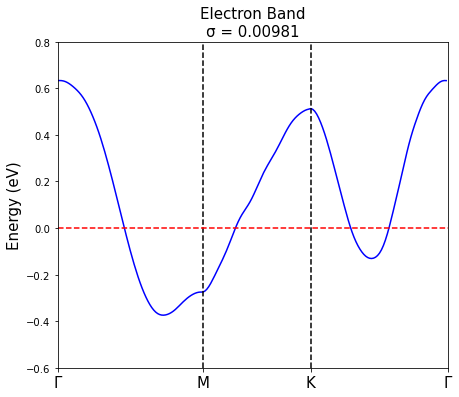

In [7]:
# ##Electron band energies in 1d path
path, sym, label= GMKG(200)
band = array(model.parallel_solver(path))
model.plot_electron_path(band,sym,label,temp)

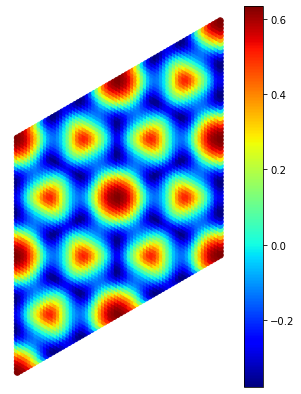

In [8]:
# ##Electron band energies in 2d mesh
mesh = model.mesh_2d(64)
band_2d = array(model.parallel_solver(mesh))
model.plot_electron_mesh(mesh=mesh, band=band_2d[6])


In [17]:
mesh_energy = model.parallel_solver(mesh)[6]
mesh_fermi = model.fermi(energy)

In [18]:
suscep = [ model.suscep(q, mesh,mesh_energy,mesh_fermi) for q in path ]

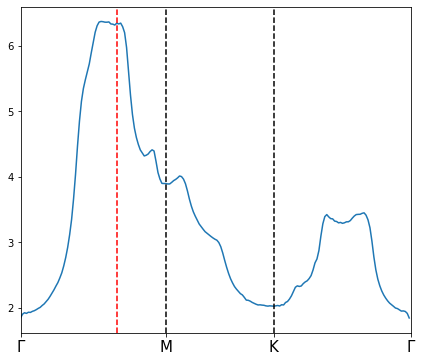

In [42]:
plt.figure(figsize=(7, 6))
plt.plot(sus_mesh)
plt.xticks(ticks=sym, labels=label, fontsize=15)
plt.xlim(sym[0], len(band.T))
plt.axvline(sym[1], c="black", linestyle="--")
plt.axvline(sym[2], c="black", linestyle="--")
plt.axvline(sym[1]*2/3, c="red", linestyle="--")
# plt.axhline(0, linestyle="--", color="red")
plt.show()